In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# Import Data

df = pd.read_json('http://facweb.cs.depaul.edu/mobasher/classes/csc577/data/fantasy_10000.json', lines=True)

# <span style = 'color: green'>Part 1. Basic Data Processing, Analysis, and Visualization</span>

In [3]:
df.shape

(10000, 11)

## <span style = 'color: blue'>1.a.</span>

In [4]:
# Add a new variable "rev_length" to the data frame 

data = df
data['rev_length'] = data['review_text'].str.len()

In [5]:
# Remove the "review_text" variable as well as variables containing dates 

data.drop(['review_text', 'date_added', 'date_updated', 'read_at', 'started_at'], axis=1, inplace = True)

In [6]:
# Display the top 10 entries in the data 

data.head(10)

,user_id,book_id,review_id,rating,n_votes,n_comments,rev_length
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,28,1,2086
1,8842281e1d1347389f2ab93d60773d4d,5577844,52c8ac49496c153e4a97161e36b2db55,5,5,1,1521
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,25,5,1519
3,8842281e1d1347389f2ab93d60773d4d,13453029,46a6e1a14e8afc82d221fec0a2bd3dd0,4,5,1,1791
4,8842281e1d1347389f2ab93d60773d4d,13239822,a582bfa8efd69d453a5a21a678046b36,3,7,0,1762
5,8842281e1d1347389f2ab93d60773d4d,62291,e23965adda7ce7e7e415a1339e169065,5,5,1,470
6,8842281e1d1347389f2ab93d60773d4d,41804,2bcbe2300fe1801197f9bfe1f1c883ba,5,12,2,823
7,8842281e1d1347389f2ab93d60773d4d,136251,132eab4c9a3724493204cc083e0e2ecc,5,6,3,532
8,8842281e1d1347389f2ab93d60773d4d,142296,400f536181a8ccf3a0f6b37d3fec14eb,4,6,2,616
9,8842281e1d1347389f2ab93d60773d4d,76620,9206654986a733bd753753aa0c882813,5,30,2,548


## <span style = 'color: blue'>1.b.</span>

In [7]:
# Display basic summary statistics (such as mean, min, max) for the numeric variables

data.describe()

,book_id,rating,n_votes,n_comments,rev_length
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.225775e+07,3.740100,1.587600,0.277800,791.691700
std,9.452557e+06,1.247921,11.348075,1.502149,1022.915566
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.072832e+06,3.000000,0.000000,0.000000,157.000000
50%,1.200049e+07,4.000000,0.000000,0.000000,429.000000
75%,1.858486e+07,5.000000,1.000000,0.000000,983.000000
max,3.630763e+07,5.000000,355.000000,45.000000,14306.000000


In [8]:
# Compute the total number of unique users and unique books in the data. 

print("Number of unique users: ", len(set(data.user_id)))
print("Number of unique books: ", len(set(data.book_id)))

Number of unique users:  649
Number of unique books:  6465


In [9]:
# Check to see if there are any null values for any of the variables

df.isnull().sum()

user_id       0
book_id       0
review_id     0
rating        0
n_votes       0
n_comments    0
rev_length    0
dtype: int64

There are no null values

## <span style = 'color: blue'>1.c.</span>

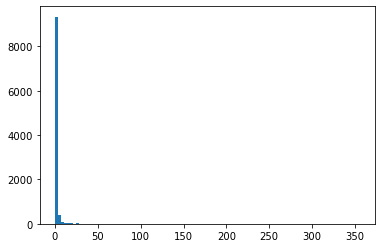

In [10]:
plt.hist(data['n_votes'], bins = 100);

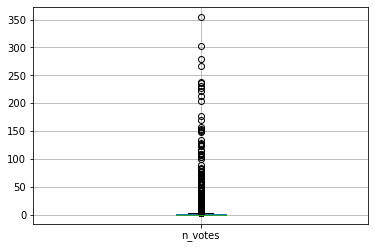

In [11]:
data.boxplot(column=['n_votes'], return_type='axes');

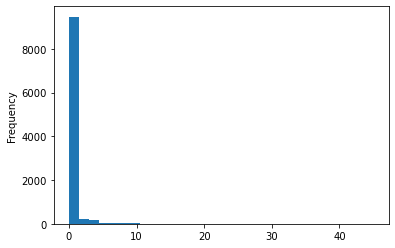

In [12]:
data['n_comments'].plot(kind = 'hist', bins = 30);

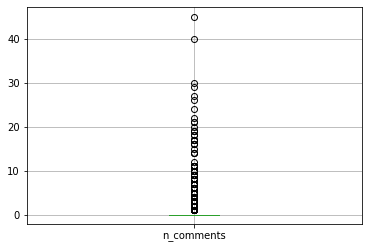

In [13]:
data.boxplot(column=['n_comments'], return_type='axes');

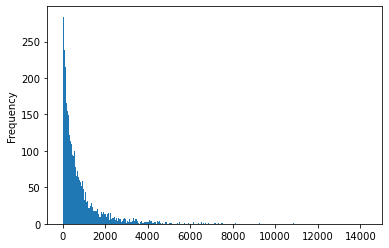

In [14]:
data['rev_length'].plot(kind = 'hist', bins = 1000);

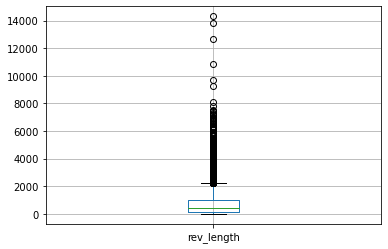

In [15]:
data.boxplot(column=['rev_length'], return_type='axes');

4    3265
5    3232
3    2113
2     778
0     326
1     286
Name: rating, dtype: int64


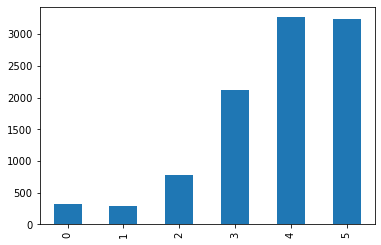

In [16]:
# Compute and display the distribution of the counts of rating values

print(data['rating'].value_counts())

data['rating'].value_counts(sort = False).plot(kind = 'bar');

## <span style = 'color: blue'>1.d.</span>

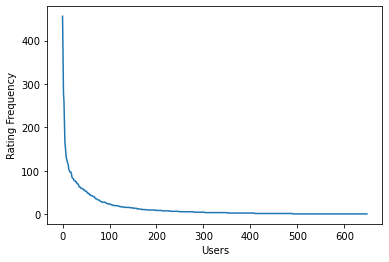

In [17]:
# Display the distribution of user rating frequncy


from collections import Counter

u_count = Counter(data.user_id)
user_freqs = np.array(list(u_count.values()))

plt.plot(sorted(user_freqs, reverse=True))
plt.ylabel('Rating Frequency')
plt.xlabel('Users')
plt.show();


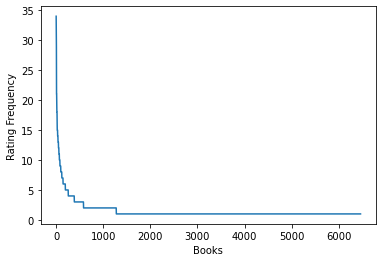

In [18]:
# Display the distribution of book rating frequncy

b_count = Counter(data.book_id)
book_freqs = np.array(list(b_count.values()))

plt.plot(sorted(book_freqs, reverse=True))
plt.ylabel('Rating Frequency')
plt.xlabel('Books')
plt.show();


## <span style = 'color: blue'>1.e.</span>

In [19]:
# Create a correlation matrix

corr_mat = data.drop(['book_id'], axis = 1).corr()
corr_mat

,rating,n_votes,n_comments,rev_length
rating,1.000000,0.009662,-0.030303,0.056344
n_votes,0.009662,1.000000,0.334845,0.024292
n_comments,-0.030303,0.334845,1.000000,0.147511
rev_length,0.056344,0.024292,0.147511,1.000000


It seems that there is no significant correlation between variables. There is a slight correlation between rev_length and n_comments.

# <span style = 'color: green'>Part 2. Regression-Based Prediction Models</span>

## <span style = 'color: blue'>2.a.</span>

In [20]:
# Construct and evaluate a basic regression models to predict the "rating" value

X = data.drop(['rating', 'user_id', 'book_id', 'review_id'], axis = 1)
y = data['rating']

In [21]:
from sklearn.model_selection import train_test_split as sklrn_split_data
X_train, X_test, y_train, y_test = sklrn_split_data(X, y, test_size=0.2, random_state=33)

In [22]:
# Normalizing the data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Build linear regression object

from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()

# Train the model using the training set
linreg.fit(X_train_scaled, y_train)

# Predict the Price values for the test data
test_preds = linreg.predict(X_test_scaled)

linreg_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_preds))
print("Final RMSE on Test Set (Linear Regression):", linreg_rmse.mean())

Final RMSE on Test Set (Linear Regression): 1.2369821856234013


## <span style = 'color: blue'>2.b.</span>

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [25]:
alpha = [0.0, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0]
# alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 0.8, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0]
# alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.5, 2.0]

rmse = np.array([])
for a in alpha:
    ridge_regression = Ridge(alpha = a)
    
    scores = cross_val_score(ridge_regression, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    scores = np.sqrt(abs(scores))
    
    rmse = np.append(rmse, [scores.mean()])
    print('{:.3f}\t{:.4f}'.format(a,scores.mean()))

0.000	1.2472
0.010	1.2472
0.100	1.2471
0.500	1.2471
1.000	1.2471
5.000	1.2474
10.000	1.2476
50.000	1.2485
100.000	1.2489
300.000	1.2492
500.000	1.2494
700.000	1.2494
1000.000	1.2494
1500.000	1.2495
2000.000	1.2495
2500.000	1.2495
3000.000	1.2495


# Note:

### From the above results, the lowest value of RMSE is 1.2471. For this case, alpha is some point between 0.1 and 0.5. 
### However, the below chart does not show the lowest point properly because the range of alpha in the above computation is very wide. 

Text(0, 0.5, 'RMSE')

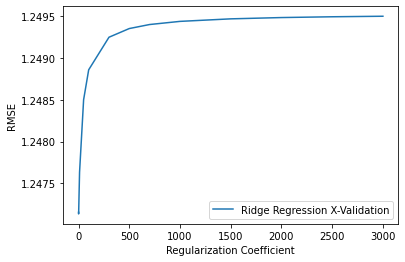

In [26]:
# plt.figure(figsize=(20,10))
plt.plot(alpha, rmse, label='Ridge Regression X-Validation')
plt.legend(loc=0)
plt.xlabel("Regularization Coefficient")
plt.ylabel("RMSE")


## So, I repeat the computation with a more narrow range for alpha.

In [27]:
alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.5, 2.0]

rmse = np.array([])
for a in alpha:
    ridge_regression = Ridge(alpha = a)
    
    scores = cross_val_score(ridge_regression, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    scores = np.sqrt(abs(scores))
    
    rmse = np.append(rmse, [scores.mean()])
    print('{:.3f}\t{:.4f}'.format(a,scores.mean()))

0.001	1.2472
0.005	1.2472
0.010	1.2472
0.050	1.2472
0.100	1.2471
0.200	1.2471
0.300	1.2471
0.500	1.2471
0.500	1.2471
0.600	1.2471
0.700	1.2471
0.800	1.2471
0.900	1.2471
1.000	1.2471
1.200	1.2471
1.500	1.2472
2.000	1.2472


Text(0, 0.5, 'RMSE')

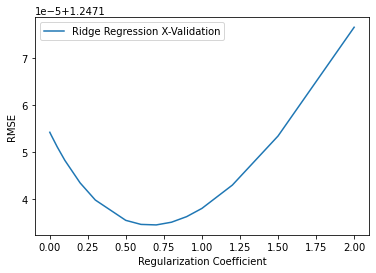

In [28]:
# plt.figure(figsize=(20,10))
plt.plot(alpha, rmse, label='Ridge Regression X-Validation')
plt.legend(loc=0)
plt.xlabel("Regularization Coefficient")
plt.ylabel("RMSE")


### From the above chart, the lowest point is around 0.6 for alpha

In [29]:
ridge_regression = Ridge(alpha = 0.6)
ridge_regression.fit(X_train_scaled, y_train)

Ridge(alpha=0.6)

In [30]:
ridge_preds = ridge_regression.predict(X_test_scaled)
print(ridge_preds[0:10])

[3.72262545 4.01462884 3.71858323 3.72805718 3.75692928 3.71322279
 3.73500474 3.73784693 3.89938875 3.23766975]


In [31]:
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, ridge_preds))
print("Final RMSE on Test Set (Ridge Regression):", ridge_rmse.mean())

Final RMSE on Test Set (Ridge Regression): 1.236966760744653


# <span style = 'color: green'>Part 3. Simple Popularity Based Prediction Model</span>

## <span style = 'color: blue'>3.a.</span>

In [32]:
# Filter data to have only Rate, User_ID, and Book_ID
# pop_data = data.drop(['review_id', 'n_votes', 'n_comments', 'rev_length'], axis = 1)

pop_x = data.drop(['review_id', 'n_votes', 'n_comments', 'rev_length', 'rating'], axis = 1)
pop_y = data['rating']

# Split data to %80 train and %20 test with Scikit Learn
# train_data, test_data = sklrn_split_data(pop_data, test_size=0.2, random_state=33)

Xtrain, Xtest, Ytrain, Ytest = sklrn_split_data(pop_x, pop_y, test_size=0.2, random_state=33)

In [33]:
def train(train_data, test_len):
    pred = train_data.mean()
    lst = []
    for i in range(test_len):
        lst.append(pred)
    return lst

In [34]:
def test(test_data, predicted_data):
    err = (test_data - predicted_data)
    e = np.array(err)
    total_error = np.dot(e,e)
    rmse = np.sqrt(total_error/len(predicted_data))
    return rmse
    

In [35]:
preds = train(Ytrain, len(Ytest))
pop_rmse = test(Ytest, preds)
print("RMSE on Training Data (Popularity Based Prediction Model): ", pop_rmse)

RMSE on Training Data (Popularity Based Prediction Model):  1.2413757489173052


# <span style = 'color: green'>Part 4. Trying out the Scikit Surpise Package for Recommendation</span>

## <span style = 'color: blue'>4.a.</span>

In [36]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# Create a ratings data frame with only the columns for user_id, Item_id and rating
rating_df = data[['user_id', 'book_id', 'rating']]

# Define a "reader" for this data set and specifying a rating_scale
reader = Reader(rating_scale=(1, 5))

# load the ratings data into a Surprise rating data structure
data_surpise = Dataset.load_from_df(rating_df[['user_id', 'book_id', 'rating']], reader)



## <span style = 'color: blue'>4.b.</span>

In [37]:
from surprise import SVD

# Create an instance of the SVD()
algo = SVD()

# Run 5-fold cross-validation and print results
cv_results_SVD = cross_validate(algo, data_surpise, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0959  1.1427  1.1204  1.1738  1.0940  1.1254  0.0301  
Fit time          0.50    0.44    0.41    0.44    0.46    0.45    0.03    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [38]:
cv_results_SVD

{'test_rmse': array([1.0959215 , 1.14273478, 1.12035396, 1.17380632, 1.09403071]),
 'fit_time': (0.4976694583892822,
  0.44083285331726074,
  0.41313862800598145,
  0.4378199577331543,
  0.4579155445098877),
 'test_time': (0.011967182159423828,
  0.009972810745239258,
  0.00997304916381836,
  0.010969400405883789,
  0.013962030410766602)}

## <span style = 'color: blue'>4.c.</span>

In [39]:
from surprise import accuracy
from surprise.model_selection import train_test_split as srps_split_data

# Split dataset with with test_size=0.2
trainset, testset = srps_split_data(data_surpise, test_size = 0.2, random_state = 40)

# Create an instance of SVD predictor with 50 as the number of latent factors 
algo = SVD(n_factors=50)

# Train the model on the 80% training set
algo.fit(trainset)

# Compute predictions for the 20% test set
predictions = algo.test(testset)

# Compute the RMSE on the test set prediction
svd_rmse = accuracy.rmse(predictions)

print('SVD-based model RMSE: ', svd_rmse)

RMSE: 1.1031
SVD-based model RMSE:  1.103106533307545


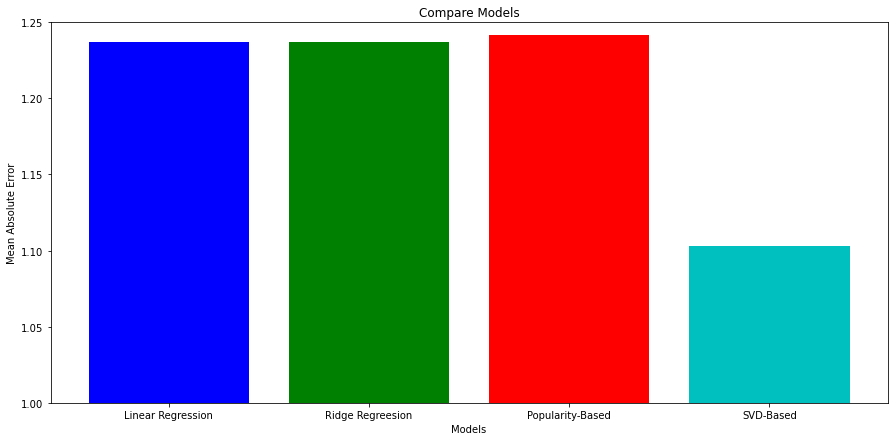

In [40]:
# Compare results

import matplotlib.colors as mcolors

x = ['Linear Regression', 'Ridge Regreesion', 'Popularity-Based', 'SVD-Based']
y = [linreg_rmse.mean(), ridge_rmse.mean(), pop_rmse, svd_rmse]

fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Absolute Error')
ax1.set_title('Compare Models')
ax1.set_ylim(1.0, 1.25)
plt.bar(x, y, color= mcolors.BASE_COLORS);

As we can see in the above chart, the SVD_Based model which obtained with the surprise package provided a significantly better result in comparison to others. Also, the Popularity-Based model provided the worst result among all these 4 models.